In [1]:
import sys
!{sys.executable} -m pip install pandas sklearn numpy
import pandas as pd
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


In [2]:
stars = pd.read_csv('../../data.csv')
stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
data = stars.iloc[:, 0:6]
data = pd.get_dummies(data)  # One-Hot encode star color because sklearn
stars["Spectral Class"].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

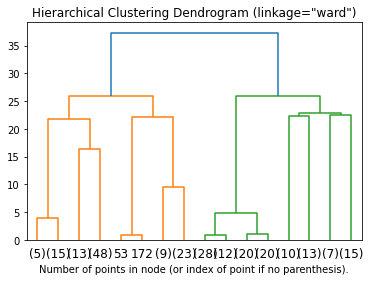

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    """
    From: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
    """
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


classifier = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

X_train = sc.fit_transform(data)

classifier.fit(X_train)

plt.title('Hierarchical Clustering Dendrogram (linkage="ward")')
# plot the top three levels of the dendrogram
plot_dendrogram(classifier, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

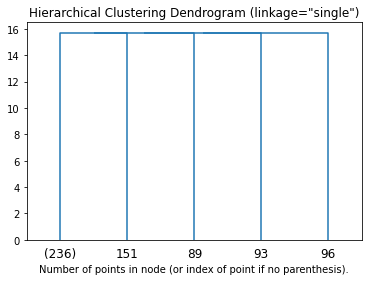

In [22]:
classifier = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single")

classifier.fit(X_train)

plt.title('Hierarchical Clustering Dendrogram (linkage="single")')
# plot the top three levels of the dendrogram
plot_dendrogram(classifier, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

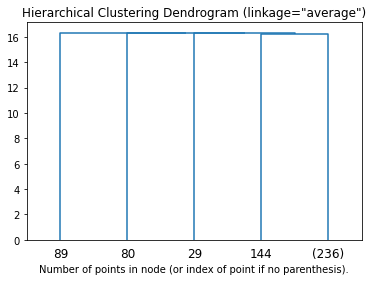

In [23]:
classifier = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="average")

classifier.fit(X_train)

plt.title('Hierarchical Clustering Dendrogram (linkage="average")')
# plot the top three levels of the dendrogram
plot_dendrogram(classifier, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

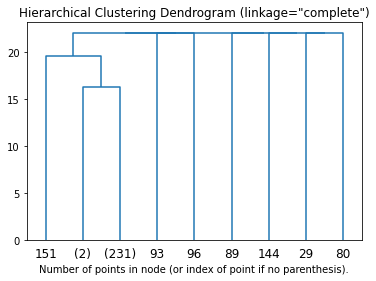

In [25]:
classifier = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete")

classifier.fit(X_train)

plt.title('Hierarchical Clustering Dendrogram (linkage="complete")')
# plot the top three levels of the dendrogram
plot_dendrogram(classifier, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()